## gaia/kepler/k2/nexsci cross-matched catalogs

In [1]:
import numpy as np
#np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy import units as u
import astropy.coordinates as coord

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

# Kepler planets

In [3]:
datadir='/home/prometheus/data/gaia/'
kep_data = Table.read(datadir+'kepler_dr2_4arcsec.fits', format='fits')

In [4]:
kep_data[:10]

angDist,kepid,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,tm_designation,ra_kic,dec_kic,kepmag,teff,teff_err1,teff_err2,teff_prov,logg,logg_err1,logg_err2,logg_prov,feh,feh_err1,feh_err2,feh_prov,radius,radius_err1,radius_err2,mass,mass_err1,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,kepoi_name,planet?
arcsec,,,deg,0.001 arcsec,deg,0.001 arcsec,0.001 arcsec,0.001 arcsec,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,ph / s,ph / s,mag,ph / s,ph / s,mag,ph / s,ph / s,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum,,deg,deg,,K,K,K,,,,,,,,,,solRad,solRad,solRad,solMass,solMass,solMass,,,,,mag,mag,mag,,
float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str25,float64,float64,float64,int64,int64,int64,str5,float64,float64,float64,str5,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,str6,int64,int64,int64,float64,float64,float64,str9,str4
0.15616,757076,2050233807328471424,291.038681305,0.0359,36.5980305018,0.0478,1.4939,0.0483,-4.961,0.079,-13.683,0.081,429068.0,130.709,11.607049,196805.0,360.632,12.116295,329938.0,372.998,10.965838,1.150457,-16.28,0.64,4927.0,nan,nan,4.01,8.524,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171,-156,PHO1,3.58,0.928,-0.232,KIC0,-0.1,0.3,-0.3,KIC0,3.128,0.987,-2.304,1.357,0.204,-0.475,DSEP,0,0,0,10.126,9.667,9.559,N/A,none
0.128262,757099,2050233601176543104,291.043057138,0.0199,36.5937670632,0.0276,2.6782,0.0272,2.88,0.043,-2.667,0.055,108912.0,153.213,13.095681,52403.4,275.227,13.552989,82009.5,312.707,12.47726,1.075729,nan,nan,5281.25,0.4943,0.2473,0.95,0.63,2MASS J19241033+3635377,291.04306,36.593811,13.152,5519,182,-149,PHO1,3.822,0.638,-0.213,KIC0,-0.22,0.35,-0.25,KIC0,2.109,0.673,-1.251,1.077,0.175,-0.233,DSEP,0,0,1,11.656,11.193,11.094,N/A,none
0.146787,757137,2050230543159814656,291.055892008,0.0194,36.559886182,0.0266,1.7234,0.0253,-4.502,0.042,-8.636,0.052,4217640.0,1078.28,9.125692,1765180.0,2398.46,9.734418,3454670.0,3346.22,8.415903,1.318515,-12.41,0.52,4683.52,0.4427,0.2043,12.47,67.381,2MASS J19241341+3633358,291.05588,36.559952,9.196,4706,74,-102,PHO1,2.374,0.03,-0.027,AST9,-0.1,0.2,-0.3,KIC0,15.447,3.54,-3.933,2.061,1.157,-0.947,DSEP,0,0,0,7.467,6.853,6.722,N/A,none
0.116421,757280,2050230611879323904,291.095372808,0.0169,36.5649028283,0.023,1.1837,0.022,-0.668,0.037,-2.782,0.046,367284.0,78.14,11.775861,206782.0,280.407,12.062609,232557.0,135.978,11.345596,0.717012,-17.96,4.93,6224.0,nan,nan,2.74,10.175,2MASS J19242289+3633538,291.0954,36.564941,11.901,6543,162,-194,PHO1,4.082,0.258,-0.172,KIC0,-0.24,0.25,-0.3,KIC0,1.638,0.475,-0.475,1.18,0.209,-0.157,DSEP,0,0,0,10.852,10.662,10.627,N/A,none
0.114502,757450,2050231848829944320,291.137620279,0.0196,36.5773443112,0.0252,1.1689,0.0261,7.99,0.044,-2.449,0.05,15988.4,10.6853,15.17885,7297.41,33.2245,15.693465,12502.6,25.0306,14.519423,1.174043,nan,nan,4993.0,0.653,0.321,0.96,0.511,2MASS J19243302+3634385,291.1376,36.577381,15.264,5332,106,-96,SPE51,4.5,0.05,-0.036,TRA51,-0.08,0.15,-0.15,SPE51,0.843,0.045,-0.045,0.821,0.061,-0.04,DSEP,1,1,1,13.665,13.262,13.118,K00889.01,conf
0.052495,891901,2050246795316077952,290.955123036,0.0893,36.6891963295,0.1049,0.8274,0.1163,-6.774,0.198,-11.038,0.206,96008.1,64.4538,13.232596,53874.3,53.8629,13.522935,62896.4,36.4098,12.765355,0.75758,nan,nan,5867.25,nan,nan,2.27,5.511,2MASS J19234924+3641212,290.95517,36.689232,13.306,6323,158,-205,PHO1,4.418,0.058,-0.232,KIC0,-0.08,0.25,-0.3,KIC0,1.093,0.378,-0.126,1.14,0.164,-0.148,DSEP

In [5]:
np.unique(kep_data['planet?'])

cand
conf
none


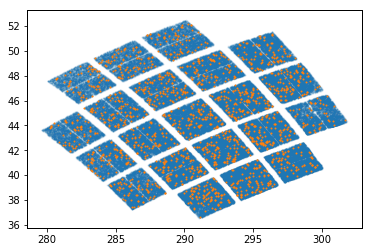

In [6]:
filter = kep_data['planet?'] == 'conf'
plt.scatter(kep_data['ra_gaia'],kep_data['dec_gaia'],alpha=0.1,s=1)
plt.scatter(kep_data[filter]['ra_gaia'],kep_data[filter]['dec_gaia'],s=1)

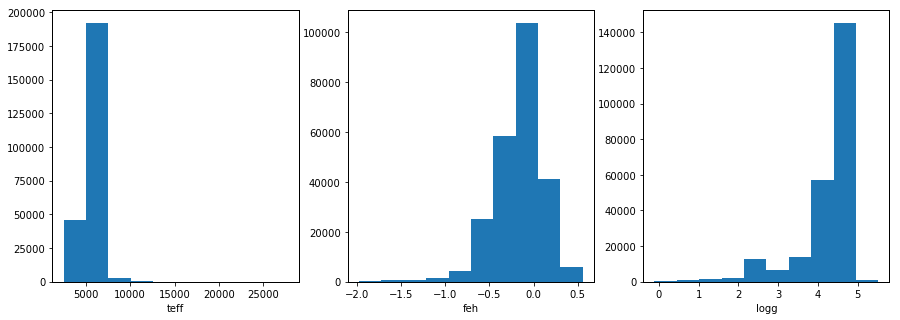

In [8]:
prop = ['teff','feh','logg']
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,p in enumerate(prop):
    name=str(p)
    filter = np.isfinite(kep_data[p])
    ax[i].hist(kep_data[p][filter]);
    ax[i].set_xlabel(name)

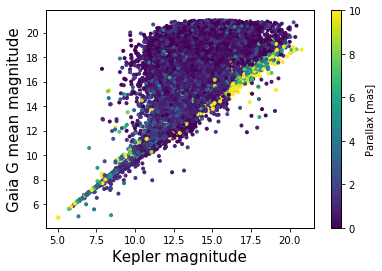

In [9]:
gmag = kep_data['phot_g_mean_mag']
kepmag = kep_data['kepmag']
parallax = kep_data['parallax']

plt.scatter(kepmag, gmag, marker='.', c=parallax)
plt.colorbar(label='Parallax [mas]')
plt.clim(0,10)
plt.ylabel('Gaia G mean magnitude', fontsize=15)
plt.xlabel('Kepler magnitude', fontsize=15)

Correlated < ~10 mag; large dispersion >10mag

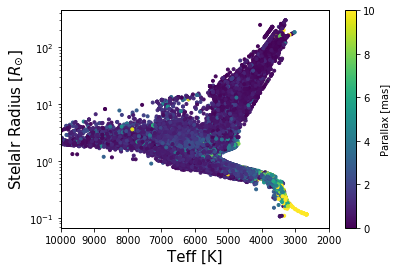

In [10]:
filter = kep_data['phot_g_mean_mag'] <= 16.

temp = kep_data['teff'][filter] #*u.Kelvin
radius = kep_data['radius'][filter] #* u.Rsun
parallax = kep_data['parallax'][filter] #* u.arcsec

plt.scatter(temp, radius, marker='.', c=parallax, cmap='viridis')
plt.colorbar(label='Parallax [mas]')
plt.clim(0,10)
plt.yscale('log')
plt.xlabel('Teff [K]', fontsize=15)
plt.xlim(10e3,2e3)
plt.ylabel('Stelalr Radius [$R_{\odot}$]', fontsize=15)

In [11]:
kep_data['dist'] = 1.e3/kep_data['parallax']
kep_data['dist'].unit = u.pc
#convert kepler magnitude to gaia magnitude
kep_data['abs_gmag'] = kep_data['phot_g_mean_mag'] - \
                            5.*(np.log10(kep_data['dist']) - 1.)
kep_data['abs_gmag'].unit = u.mag

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


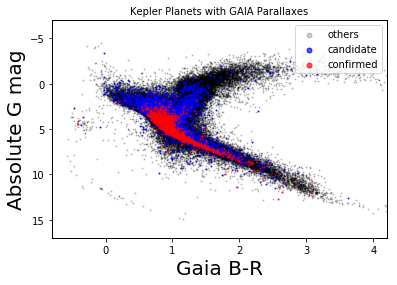

In [12]:
filter = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax'] > 0.1)
plt.scatter(kep_data['bp_rp'][filter], kep_data['abs_gmag'][filter], label='others',alpha=0.2, color='k', s=1)
filter2 = (kep_data['planet?'] == 'cand') & filter
#add Kepler planet candidates
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], label='candidate', alpha=0.7, s=1, color='b')
filter2 = (kep_data['planet?'] == 'conf') & filter
#add Kepler confirmed planets
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], label='confirmed', alpha=0.7, s=1, color='r')
plt.xlabel('Gaia B-R', fontsize=20)
plt.ylabel('Absolute G mag', fontsize=20)
plt.ylim([17,-7])
plt.xlim([-0.8,4.2])
plt.title('Kepler Planets with GAIA Parallaxes', fontsize=10)
plt.legend(loc='upper right', fontsize=10, markerscale=5)
#plt.text(0.75,1.02,'gaia-kepler.fun', transform=plt.gca().transAxes)
#plt.savefig('../img/colormag_kepler.png')

* There are a few planets in the flare stars/red dwarf/brown dwarf branch (lower right)
* There are confirmed and candidate planets between the MS branch and WD branch (center left)?

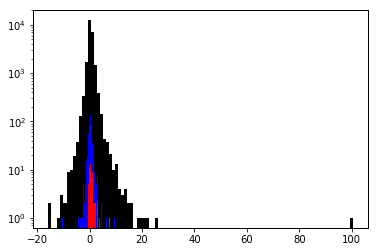

In [13]:
filter = (kep_data['phot_g_mean_mag'] >= 18.) & np.isfinite(kep_data['parallax'])

plt.hist(kep_data['parallax'][filter], bins=100, color='k');
filter2 = filter & (kep_data['planet?'] == 'cand')
plt.hist(kep_data['parallax'][filter2], bins=100, color='b');
filter2 = filter & (kep_data['planet?'] == 'conf')
plt.hist(kep_data['parallax'][filter2], bins=100, color='r');
plt.yscale('log')

# K2 planets

In [14]:
k2_data = Table.read(datadir+'k2_dr2_4arcsec.fits', format='fits')

In [15]:
k2_data.columns.keys()

['angDist',
 'epic_number',
 'source_id',
 'ra_gaia',
 'ra_error',
 'dec_gaia',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'teff_val',
 'a_g_val',
 'e_bp_min_rp_val',
 'radius_val',
 'lum_val',
 'tm_name',
 'k2_campaign_str',
 'k2_type',
 'ra_nasa',
 'dec_nasa',
 'k2_lcflag',
 'k2_scflag',
 'k2_teff',
 'k2_tefferr1',
 'k2_tefferr2',
 'k2_logg',
 'k2_loggerr1',
 'k2_loggerr2',
 'k2_metfe',
 'k2_metfeerr1',
 'k2_metfeerr2',
 'k2_rad',
 'k2_raderr1',
 'k2_raderr2',
 'k2_mass',
 'k2_masserr1',
 'k2_masserr2',
 'k2c_disp',
 'k2c_note']

In [16]:
np.unique(k2_data['k2c_disp'])

CANDIDATE
CONFIRMED
FALSE POSITIVE
N/A


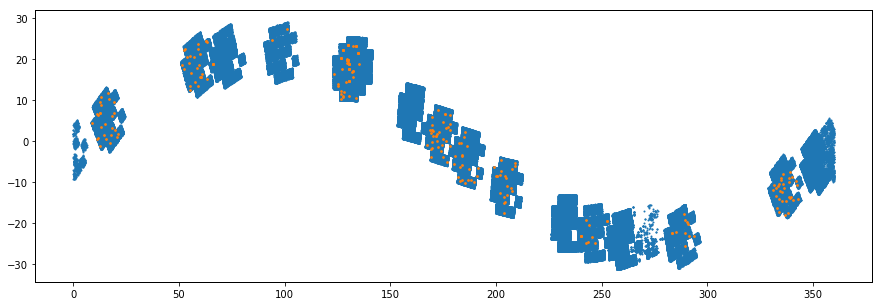

In [17]:
fig = plt.figure(figsize=(15,5))
filter = k2_data['k2c_disp'] == 'CONFIRMED'
plt.scatter(k2_data['ra_gaia'],k2_data['dec_gaia'],s=1)
plt.scatter(k2_data['ra_gaia'][filter],k2_data['dec_gaia'][filter], s=3)

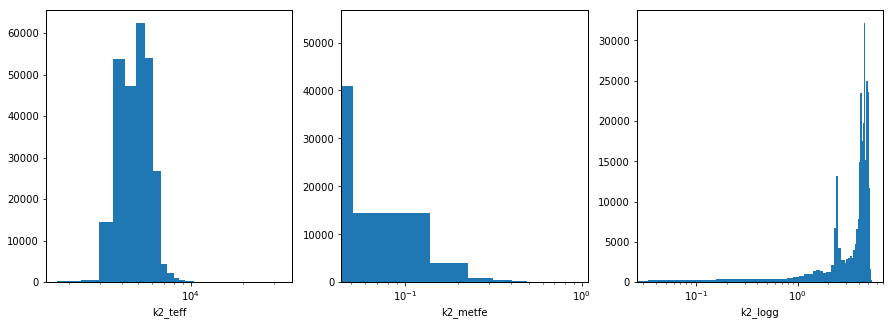

In [29]:
prop = ['k2_teff','k2_metfe','k2_logg']
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,p in enumerate(prop):
    name=str(p)
    try:
        filter = np.isfinite(k2_data[p])
        ax[i].hist(k2_data[p][filter],bins=50);
        ax[i].set_xlabel(name, fontsize=10)
        ax[i].set_xscale('log')
    except:
        pass

In [19]:
k2_data['dist'] = 1.e3/k2_data['parallax']
k2_data['dist'].unit = u.pc
k2_data['abs_gmag'] = k2_data['phot_g_mean_mag'] - \
                            5.*(np.log10(k2_data['dist']) - 1.)
k2_data['abs_gmag'].unit = u.mag

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


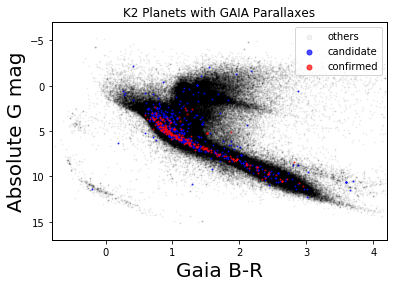

In [20]:
filter = (k2_data['phot_g_mean_mag'] <= 18.) & (k2_data['parallax'] > 0.1)
plt.scatter(k2_data['bp_rp'][filter], k2_data['abs_gmag'][filter], label='others', alpha=0.05, color='k', s=1)
#add k2 planet candidates
filter2 = (k2_data['k2c_disp'] == 'CANDIDATE') & filter
plt.scatter(k2_data['bp_rp'][filter2], k2_data['abs_gmag'][filter2], label='candidate', alpha=0.7, s=1, color='b')
#add k2 confirmed planets 
filter2 = (k2_data['k2c_disp'] == 'CONFIRMED') & filter
plt.scatter(k2_data['bp_rp'][filter2], k2_data['abs_gmag'][filter2], label='confirmed', alpha=0.7, s=1, color='r')
plt.xlabel('Gaia B-R', fontsize=20)
plt.ylabel('Absolute G mag', fontsize=20)
plt.ylim([17,-7])
plt.xlim([-0.8,4.2])
plt.title('K2 Planets with GAIA Parallaxes')
plt.legend(loc='upper right', fontsize=10, markerscale=5)
#plt.text(0.75,1.02,'gaia-kepler.fun', transform=plt.gca().transAxes)
plt.savefig('../img/colormag_k2.png')

In [21]:
import k2plr

def get_ra_dec(epicnum,verbose=False):
    client = k2plr.API()
    if verbose:
        print('\nquerying RA and DEC...\n')
    epic = client.k2_star(int(epicnum))
    ra = epic.k2_ra
    dec = epic.k2_dec
    return ra, dec

In [22]:
np.unique(k2_data['k2_type'])

EXTENDED
N/A
STAR


# NExSci planets

In [23]:
datadir='/home/prometheus/data/gaia/'
nexsci_data = Table.read(datadir+'confirmed_dr2_4arcsec.fits', format='fits')

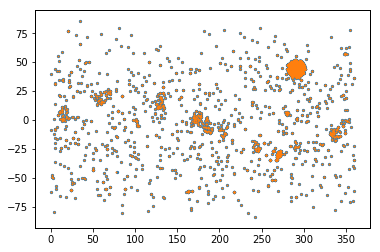

In [24]:
#comparison
plt.scatter(nexsci_data['ra_gaia'],nexsci_data['dec_gaia'],s=5)
plt.scatter(nexsci_data['ra_nasa'],nexsci_data['dec_nasa'],s=1)

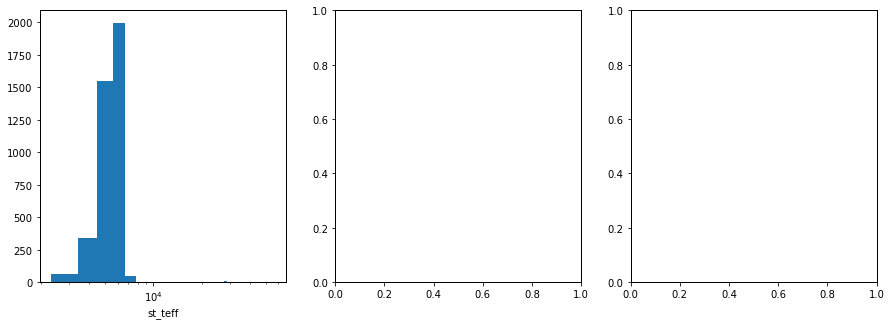

In [25]:
prop = ['st_teff','st_metfe','st_logg']
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,p in enumerate(prop):
    name=str(p)
    try:
        filter = np.isfinite(nexsci_data[p])
        ax[i].hist(nexsci_data[p][filter],bins=50);
        ax[i].set_xlabel(name)
        ax[i].set_xscale('log')
    except:
        pass

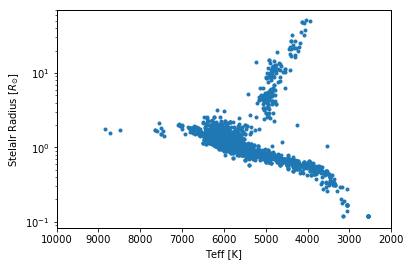

In [26]:
filter = nexsci_data['phot_g_mean_mag'] <= 16.

temp =nexsci_data['st_teff'][filter]*u.Kelvin
radius = nexsci_data['st_rad'][filter]* u.Rsun
plt.scatter(temp, radius, marker='.')
plt.yscale('log')
plt.xlabel('Teff [K]')
plt.xlim(10e3,2e3)
plt.ylabel('Stelalr Radius [$R_{\odot}$]')

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, oper)(other)


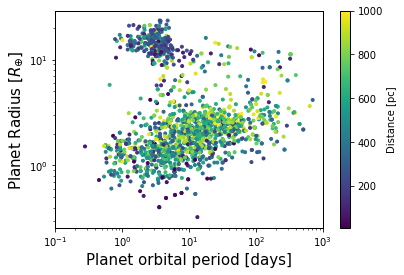

In [27]:
filter = np.isfinite(nexsci_data['st_dist']) & (nexsci_data['st_dist'] <= 1000)

period = nexsci_data['pl_orbper'][filter]*u.Rearth
radius = nexsci_data['pl_radj'][filter]*u.Rjup.to(u.Rearth)
distance = nexsci_data['st_dist'][filter]*u.pc

plt.scatter(period, radius, c=distance, marker='.')
plt.colorbar(label='Distance [pc]')
plt.ylabel('Planet Radius [$R_{\oplus}$]', fontsize=15)
plt.xlabel('Planet orbital period [days]', fontsize=15)
plt.xlim(1e-1,1e3)
plt.yscale('log')
plt.xscale('log')

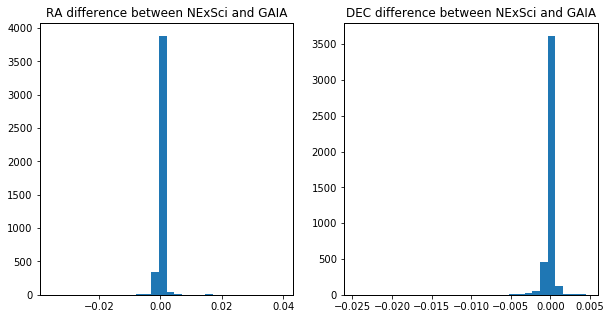

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(nexsci_data['ra_gaia']-nexsci_data['ra_nasa'],bins=30);
ax[0].set_title('RA difference between NExSci and GAIA')
ax[1].hist(nexsci_data['dec_gaia']-nexsci_data['dec_nasa'],bins=30);
ax[1].set_title('DEC difference between NExSci and GAIA')

## Animation

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import animation
from IPython.display import HTML
from astropy.time import Time

In [ ]:
filter = (kep_data['phot_g_mean_mag'] >= 18.) & (kep_data['parallax'] > 0.01)
#filter = filter & (kep_data['planet?'] == 'cand')
tab = kep_data[filter]

In [ ]:
gaia_time = Time('2015-01-01')
tab['radial_velocity'][np.isnan(tab['radial_velocity'])] = 0.

In [ ]:
amplitude = 1e5
tab['radial_velocity'] *= amplitude
tab['pmra'] *= amplitude
tab['pmdec'] *= amplitude
tab['parallax'] *= amplitude

In [ ]:
def animfunc(t, xlim, ylim, ax):
    sclater = scnow.apply_space_motion(new_obstime=gaia_time + t * u.yr)
    
    ax.cla()
    ax.set_title('Kepler field, T={:,.0f} years'.format(t*amplitude), fontsize=18)
    s = ax.scatter(sclater.ra.deg, sclater.dec.deg, c=np.log10(sclater.distance.value), 
               **scatkwargs)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_ylabel('Right Ascension (degrees)', fontsize=16)
    ax.set_xlabel('Declination (degrees)', fontsize=16)
    ax.grid(alpha=.5)
    #cbar = fig.colorbar(s, ax=ax, ticks=[1,2,3,4,5])
    #cbar.ax.set_yticklabels(['10', '100', '1000', '10k', '100k'])  # vertically oriented colorbar
    #cbar.set_label('Distance (pc)', rotation=270)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

scatkwargs = dict(alpha=.7, s=3, cmap='viridis')

times = np.linspace(-5., 0., 51)
times = np.append(times, np.zeros(20))
times = np.append(times, np.linspace(0., 5., 51))

anim1 = animation.FuncAnimation(fig, animfunc, times,
                                fargs=([275,305], [33,55], ax), 
                                interval=50)

plt.close(fig)
#HTML(anim1.to_html5_video())

In [ ]:
anim1.save('kepler_propermotions.gif', dpi=80, writer='imagemagick')